In [33]:
from sklearn import *
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier,
                              AdaBoostClassifier)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE



%pylab

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [34]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns #for graphics and figure styling
import pandas as pd
from matplotlib.colors import ListedColormap

In [51]:
data = pd.read_csv('E:/Stony Brook/AMS560/Data/FlightDelay2018.csv')
data=data[1:50000]
data.DepDelayMinutes.fillna(1)
data.DepDelayMinutes[data.DepDelayMinutes!=0]=1

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [52]:
from collections import defaultdict
a=0
b=0
missing=defaultdict(int)
for col in data:
    for i in data[col].isnull():
        if i:
            a+=1
        b+=1
    #print('Missing data in',col,'is',a/b*100,'%')
    missing[col]=a/b*100
    a=0
    b=0
missing['Year']

for col in data:
    if missing[col]>5:
        data=data.drop(col, axis=1)

In [53]:
data=data.drop('TailNum',axis=1)
enc = LabelEncoder()
data = data.apply(LabelEncoder().fit_transform)

In [54]:
depDelayColumn = data.DepDelayMinutes
data = data.drop('DepDelayMinutes', axis=1)
data = data.drop('DepDelay', axis=1)
data = data.drop(['CRSDepTime','DepTime','DepartureDelayGroups'], axis=1)



In [78]:
data_train, data_test, y_train, y_test = train_test_split(data, depDelayColumn, test_size=.3)
scaler = StandardScaler().fit(data)
standard_data_test = scaler.transform(data_test)

scaler = StandardScaler().fit(data_train)
standard_data = scaler.transform(data_train)

In [84]:
#Using the Random Forest Classifier on our Data, with depth 3.
depth=3;
n_features=5;
censusIDM = RandomForestClassifier(max_depth=depth, random_state=0)
frfe = RFE(censusIDM, n_features_to_select=n_features)
frfe.fit(data_train, y_train)
print(frfe.ranking_)
frfe.score(data_test, y_test)

[46 45 44 12 20  1 19 15 14 10 13 25 26 11 22 29 28 21  9 30 32 33 36 38
 40 42 43 41  1 16  3  2  5  8  7  4  1  1  6  1 17 18 23 24 27 31 34 35
 37 39]


0.8468

In [85]:
feature_to_select=[0]*n_features
j=0
for i in range(len(frfe.ranking_)):
    if frfe.ranking_[i]==1:
        feature_to_select[j]=i
        j=j+1
print(feature_to_select)

[5, 28, 36, 37, 39]


In [95]:
data.columns[36]

'ArrDelay'

0.8458666666666667
0.8132666666666667
0.8464666666666667


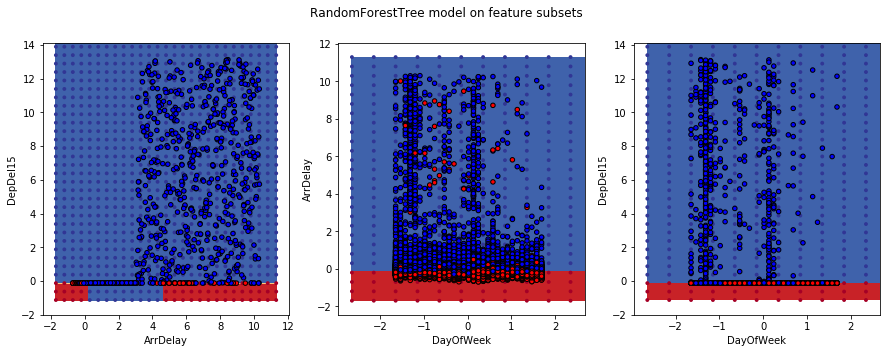

In [100]:
# Parameters
n_classes = 2
n_estimators = 30
cmap = plt.cm.RdYlBu
plot_step = 0.02  # fine step width for decision surface contours
plot_step_coarser = 0.5  # step widths for coarse classifier guesses
RANDOM_SEED = 13  # fix the seed on each iteration

fig=plt.figure(figsize=[15,5])
plt.subplot(1,3, 1)

f1=[36,28]
f2=[5,36]
f3=[5,28]

#X=standardized_test_data[:,[0,4]];
X=standard_data[:,f1];
y=y_train

frfe.fit(X, y)
print(frfe.score(standard_data_test[:,f1], y_test))

mean = X.mean(axis=0)
std = X.std(axis=0)
X = (X - mean) / std

        # Now plot the decision boundary using a fine mesh as input to a
        # filled contour plot
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = frfe.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=cmap)
            
xx_coarser, yy_coarser = np.meshgrid(
    np.arange(x_min, x_max, plot_step_coarser),
    np.arange(y_min, y_max, plot_step_coarser))
Z_points_coarser = frfe.predict(np.c_[xx_coarser.ravel(),yy_coarser.ravel()]).reshape(xx_coarser.shape)
cs_points = plt.scatter(xx_coarser, yy_coarser, s=15,c=Z_points_coarser, cmap=cmap, edgecolors="none")

        # Plot the training points, these are clustered together and have a
        # black outline
plt.scatter(X[:, 0], X[:, 1], c=y,
            cmap=ListedColormap(['r', 'y', 'b']),
            edgecolor='k', s=20)
xlabel('ArrDelay')
ylabel('DepDel15')


plt.subplot(1,3,2)
X=standard_data[:,f2];

frfe.fit(X, y)
print(frfe.score(standard_data_test[:,f2], y_test))

mean = X.mean(axis=0)
std = X.std(axis=0)
X = (X - mean) / std

        # Now plot the decision boundary using a fine mesh as input to a
        # filled contour plot
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = frfe.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=cmap)
            
xx_coarser, yy_coarser = np.meshgrid(
    np.arange(x_min, x_max, plot_step_coarser),
    np.arange(y_min, y_max, plot_step_coarser))
Z_points_coarser = frfe.predict(np.c_[xx_coarser.ravel(),yy_coarser.ravel()]).reshape(xx_coarser.shape)
cs_points = plt.scatter(xx_coarser, yy_coarser, s=15,c=Z_points_coarser, cmap=cmap, edgecolors="none")

        # Plot the training points, these are clustered together and have a
        # black outline
plt.scatter(X[:, 0], X[:, 1], c=y,
            cmap=ListedColormap(['r', 'y', 'b']),
            edgecolor='k', s=20)
xlabel('DayOfWeek')
ylabel('ArrDelay')


plt.subplot(1,3,3)
X=standard_data[:,f3];

frfe.fit(X, y)
print(frfe.score(standard_data_test[:,f3], y_test))

mean = X.mean(axis=0)
std = X.std(axis=0)
X = (X - mean) / std

        # Now plot the decision boundary using a fine mesh as input to a
        # filled contour plot
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = frfe.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=cmap)
            
xx_coarser, yy_coarser = np.meshgrid(
    np.arange(x_min, x_max, plot_step_coarser),
    np.arange(y_min, y_max, plot_step_coarser))
Z_points_coarser = frfe.predict(np.c_[xx_coarser.ravel(),yy_coarser.ravel()]).reshape(xx_coarser.shape)
cs_points = plt.scatter(xx_coarser, yy_coarser, s=15,c=Z_points_coarser, cmap=cmap, edgecolors="none")

        # Plot the training points, these are clustered together and have a
        # black outline
plt.scatter(X[:, 0], X[:, 1], c=y,
            cmap=ListedColormap(['r', 'y', 'b']),
            edgecolor='k', s=20)
xlabel('DayOfWeek')
ylabel('DepDel15')

plt.suptitle('RandomForestTree model on feature subsets ');

#fig.savefig('RandomForest.pdf',dpi=200)